In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import rc

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import re
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

%matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ILDC_single.csv")
df.head()

,text,label,split,name
0,"F. NARIMAN, J. Leave granted. In 2008, the Pu...",1,train,2019_890.txt
1,"S. THAKUR, J. Leave granted. These appeals ar...",0,train,2014_170.txt
2,"Markandey Katju, J. Leave granted. Heard lear...",1,train,2010_721.txt
3,"ALTAMAS KABIR,J. Leave granted. The question ...",1,train,2008_1460.txt
4,"CIVIL APPEAL NO. 598 OF 2007 K. MATHUR, J. Th...",1,train,2008_188.txt


In [ ]:
df.drop(df.columns[[2,3]], axis=1, inplace=True)
df.head()

,text,label
0,"F. NARIMAN, J. Leave granted. In 2008, the Pu...",1
1,"S. THAKUR, J. Leave granted. These appeals ar...",0
2,"Markandey Katju, J. Leave granted. Heard lear...",1
3,"ALTAMAS KABIR,J. Leave granted. The question ...",1
4,"CIVIL APPEAL NO. 598 OF 2007 K. MATHUR, J. Th...",1


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(20)

,text,label
5797,criminal appellate jurisdiction criminal\nappe...,0
5044,1995 3 Suppl. SCR 177 The Judgment of the C...,1
7542,civil appellate jurisdiction civil appeal numb...,1
2041,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,0
4485,CIVIL APPELLATE JURISDICTION Civil Appeal Nos....,1
1970,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1
3735,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,0
939,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1
7314,civil appellate jurisdiction civil appeal numb...,0
4109,CIVIL APPELLATE JURISDICTION Civil Appeal No. ...,1


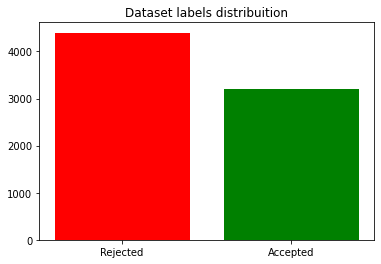

In [ ]:
# Count the number of entities in each category
target_cnt = Counter(df.label)
plt.figure(figsize=(6,4))
plt.bar(target_cnt.keys(), target_cnt.values(), tick_label=('Rejected','Accepted'), color=['r','g'])
plt.title("Dataset labels distribuition")
plt.show()

In [ ]:
x = df.loc[:,'text']
y = df.loc[:,"label"]

In [ ]:
x.describe

<bound method NDFrame.describe of 5797    criminal appellate jurisdiction criminal\nappe...
5044     1995  3  Suppl. SCR 177 The Judgment of the C...
7542    civil appellate jurisdiction civil appeal numb...
2041    CIVIL APPELLATE JURISDICTION Civil Appeal No. ...
4485    CIVIL APPELLATE JURISDICTION Civil Appeal Nos....
                              ...                        
5990    civil appellate jurisdiction civil appeal numb...
2960    CRIMINAL APPELLATE JURISDICTION Criminal Appea...
5390    civil appellate jurisdiction civil appeal numb...
2803    CRIMINAL APPELLATE JURISDICTION Criminal Appea...
3811    CRIMINAL APPELLATE JURISDICTION Criminal Appea...
Name: text, Length: 7593, dtype: object>

In [ ]:
y.describe

<bound method NDFrame.describe of 5797    0
5044    1
7542    1
2041    0
4485    1
       ..
5990    0
2960    1
5390    0
2803    0
3811    0
Name: label, Length: 7593, dtype: int64>

In [ ]:
X_train, X_dev, X_test = x[:5316], x[5316:6076], x[6076:]
y_train, y_dev, y_test = y[:5316], y[5316:6076], y[6076:]

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
!gzip -d cc.en.300.vec.gz

--2022-08-06 16:08:25--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1325960915 (1.2G) [binary/octet-stream]
Saving to: ‘cc.en.300.vec.gz’

cc.en.300.vec.gz    100%[===================>]   1.23G  54.0MB/s    in 23s     

2022-08-06 16:08:49 (53.8 MB/s) - ‘cc.en.300.vec.gz’ saved [1325960915/1325960915]

gzip: cc.en.300.vec already exists; do you wish to overwrite (y or n)? y
y
n


In [ ]:
import pickle

idx = 0
vocab = {}
with open("cc.en.300.vec", 'r', encoding="utf-8", newline='\n', errors='ignore') as f:
    for l in f:
        line = l.rstrip().split(' ')
        if idx == 0:
            vocab_size = int(line[0]) + 2
            dim = int(line[1])
            vecs = np.zeros(vocab_size*dim).reshape(vocab_size,dim)
            vocab["__PADDING__"] = 0
            vocab["__UNK__"] = 1
            idx = 2
        else:
            vocab[line[0]] = idx
            emb = np.array(line[1:]).astype(np.float)
            if (emb.shape[0] == dim):
                vecs[idx,:] = emb
                idx+=1
            else:
                continue

    pickle.dump(vocab,open("fasttext_voc",'wb'))
    np.save("fasttext.npy",vecs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
def recall(y_true, y_pred):
    """
    Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    """
    Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)), axis=1)


In [ ]:
fasttext_embed = np.load("fasttext.npy")
fasttext_word_to_index = pickle.load(open("fasttext_voc", 'rb'))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = fasttext_embed.shape[1]
tokenizer = Tokenizer(num_words=MAX_WORDS,oov_token='__UNK__')
tokenizer.fit_on_texts(X_train)
train_seqs = tokenizer.texts_to_sequences(X_train)
dev_seqs = tokenizer.texts_to_sequences(X_dev)
train_data = pad_sequences(train_seqs, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
dev_data = pad_sequences(dev_seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_seqs = tokenizer.texts_to_sequences(X_test)
test_data = pad_sequences(test_seqs, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 112285 unique tokens.


In [ ]:
embedding_matrix = np.zeros((MAX_WORDS+2, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_WORDS:
            continue
    try:
        embedding_vector = fasttext_embed[fasttext_word_to_index[word],:]
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [ ]:
# to run tensorflow on mac
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras-tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


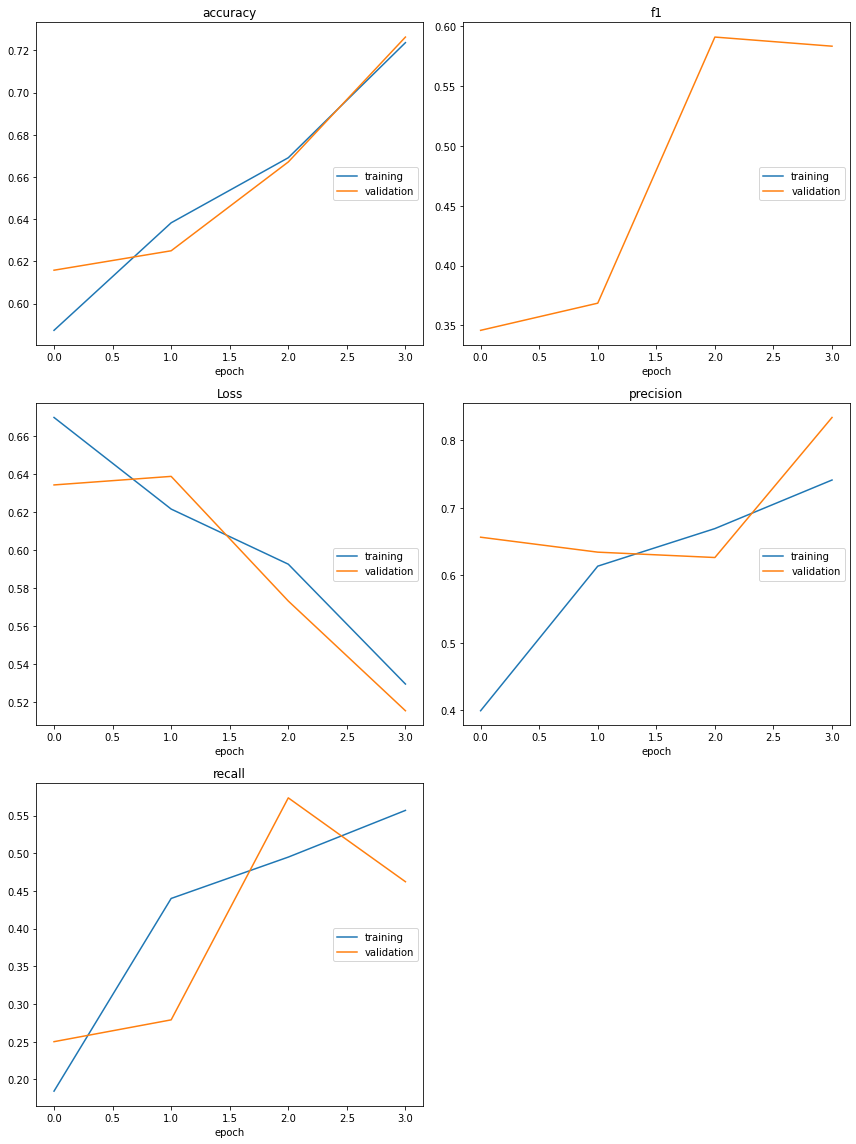

accuracy
	training         	 (min:    0.587, max:    0.724, cur:    0.724)
	validation       	 (min:    0.616, max:    0.726, cur:    0.726)
f1
	training         	 (min:      nan, max:      nan, cur:      nan)
	validation       	 (min:    0.346, max:    0.591, cur:    0.583)
Loss
	training         	 (min:    0.530, max:    0.670, cur:    0.530)
	validation       	 (min:    0.516, max:    0.639, cur:    0.516)
precision
	training         	 (min:    0.400, max:    0.741, cur:    0.741)
	validation       	 (min:    0.627, max:    0.834, cur:    0.834)
recall
	training         	 (min:    0.184, max:    0.557, cur:    0.557)
	validation       	 (min:    0.250, max:    0.573, cur:    0.462)


In [ ]:
import sklearn.exceptions
import warnings
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.callbacks import ModelCheckpoint
from keras.layers.embeddings import Embedding
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Dense, Dropout, Bidirectional
from keras.layers.recurrent import GRU
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from livelossplot.tf_keras import PlotLossesCallback

GRU_SIZE = 100
DENSE = 200

# create empty sequential model
model = Sequential()
# add an embedding layer
model.add(Embedding(MAX_WORDS+2, EMBEDDING_DIM, weights=[embedding_matrix], 
                    input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False))
# Use 0.2 dropout probabillity
model.add(Dropout(0.2))
# add a bidirectional gru layer with 0.2 variational (recurrent) dropout 
model.add(Bidirectional(GRU(GRU_SIZE, return_sequences=False, recurrent_dropout = 0.2)))
# add a hidden MLP layer
model.add(Dropout(0.2))
model.add(Dense( DENSE, activation='relu' ))
# add the output MLP layer
model.add(Dense(1, activation='sigmoid'))
from livelossplot.tf_keras import PlotLossesCallback

print(model.summary())

model.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=0.001),
                  metrics=[precision, recall, f1, accuracy])
checkpoint = ModelCheckpoint('keras_BiGRU_model', monitor='val_f1', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_data, y_train,
              batch_size = 32,
              epochs = 4,
              verbose = 0,
              callbacks=[checkpoint,PlotLossesCallback()],
              validation_data=(dev_data, y_dev),shuffle=True)

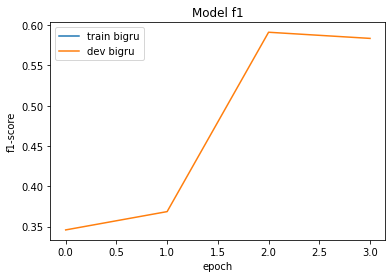

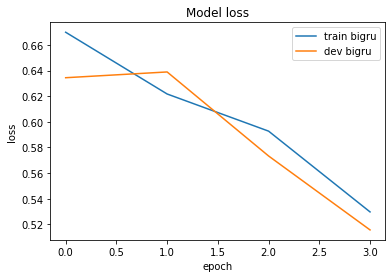

In [ ]:
# summarize history for f1 bigru
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model f1')
plt.ylabel('f1-score')
plt.xlabel('epoch')
plt.legend(['train bigru', 'dev bigru'], loc='upper left')
plt.show()

# summarize history for loss bigru
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train bigru', 'dev bigru'], loc='upper right')
plt.show()

In [ ]:
'''
#load weights from the pre-trained model
model.load_weights("keras_BiGRU_model")
model.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=0.001),
                  metrics=[precision, recall, f1, accuracy])
'''

score = model.evaluate(
    test_data,
    y_test,
    batch_size=32,
    verbose=0)

print('\nTest Binary_cross_entropy: %.4f' %  (score[0]))
print('\nTest precision: %.4f' %  (score[1]))
print('\nTest recall: %.4f' %  (score[2]))
print('\nTest f1: %.4f' % (score[3]))
print('\nTest accuracy: %.4f'% (score[4]))


Test Binary_cross_entropy: 0.5135

Test precision: 0.8469

Test recall: 0.4753

Test f1: 0.5979

Test accuracy: 0.7363


In [ ]:
predictions = model.predict(test_data)
predictions = predictions.reshape(len(predictions),)

for i in range(len(predictions)):
    if predictions[i]<0.5:
        predictions[i]=0
    else:
        predictions[i]=1

y_true = pd.Series(y_test, name='True')
y_pred = pd.Series(predictions, name='Predicted')
pd.crosstab(y_true, y_pred)

Predicted,0.0,1.0
True,,
0,154,53
1,84,20


In [ ]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[811,  59],
       [341, 306]])